In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as mn
import re
%matplotlib inline

In [156]:
df_train = pd.read_csv('train.csv')

In [157]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [158]:
df_train.shape

(1460, 81)

In [159]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [160]:
df_train['SalePrice'].describe()

#All homes have a valid sale price (min > 0)

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

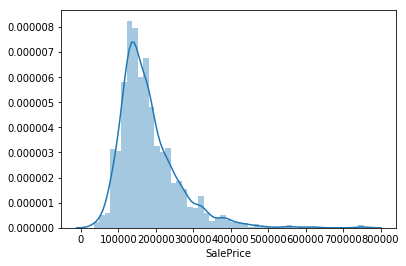

In [161]:
sns.distplot(df_train['SalePrice']);

In [162]:
print(df_train['SalePrice'].skew())
print(df_train['SalePrice'].kurt())

1.88287575977
6.53628186006


In [163]:
#Total number of null values. Will remove all > 20%. Just picked an arbitrary number for exploration.

total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


In [164]:
train = df_train.drop((missing_data[missing_data['Percent'] > 20]).index,1)
train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
train.isnull().sum().max() #checking for missing data

1452

In [165]:
train.shape

(1459, 81)

In [166]:
train.dtypes
mytypes = train.columns.to_series().groupby(train.dtypes).groups
mytypes

{dtype('int64'): Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'),
 dtype('float64'): Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object'),
 dtype('O'): Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 

In [167]:
nums = list(list(mytypes.values())[0])
nums.append(list(list(mytypes.values())[1]))
cats = list(list(mytypes.values())[2])
stragglers = nums[-1]
nums.remove(nums[-1])
nums = nums + stragglers #unnesting list
print(nums)
print(cats)

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Gara

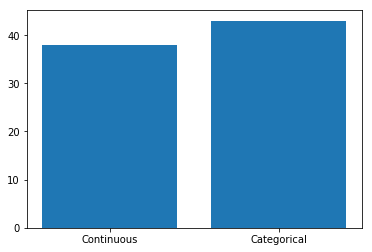

In [168]:
plotcounts = {u'Continuous': len(nums), u'Categorical': len(cats)}

plt.bar(range(len(plotcounts)), list(plotcounts.values()), align='center')
plt.xticks(range(len(list(plotcounts.keys()))), list(plotcounts.keys()))

plt.show()

#want to break categorical data down to ordinal and nominal

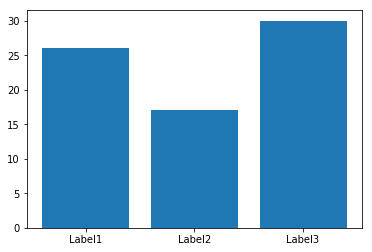

In [169]:
D = {u'Label1':26, u'Label2': 17, u'Label3':30}

plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
# # for python 2.x:
# plt.bar(range(len(D)), D.values(), align='center')  # python 2.x
# plt.xticks(range(len(D)), D.keys())  # in python 2.x

plt.show()

In [170]:
nums

#The following are not continuous numerical variables:
#OverallQual: ordinal
#OverallCond: ordinal
#YearBuilt: nominal (most likely)
#YearRemodAdd: nominal (most likely)
#MoSold: nominal
#YrSold: nominal (most likely)
#GarageYrBlt: nominal (most likely)

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'LotFrontage',
 'MasVnrArea',
 'GarageYrBlt']

In [171]:
#Split numerical and categorical variables

IndexNum = train.columns[(train.dtypes == 'int64')| (train.dtypes == 'float64')]
IndexCat = train.columns[train.dtypes == 'object']

In [172]:
#train = train[train.columns].astype(float)
#sns.heatmap(train)

In [173]:
#Create pandas data frame for numerical and categorical data

tnNum = train[IndexNum]
tnCat = train[IndexCat]

In [174]:
print(type(tnNum))
print(type(tnCat))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [175]:
print(tnNum.shape)
print(tnCat.shape)

(1459, 38)
(1459, 43)


In [176]:
tnNum.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [177]:
numtotal = tnNum.isnull().sum().sort_values(ascending=False)
numpercent = (tnNum.isnull().sum()/tnNum.isnull().count()*100).sort_values(ascending=False)
missing_num = pd.concat([numtotal, numpercent], axis=1, keys=['Total', 'Percent'])
tnNum_miss = missing_num.loc[missing_num['Percent'] > 0]
numNull_col = tnNum_miss.index
print(numNull_col)
tnNum_miss

Index(['LotFrontage', 'GarageYrBlt', 'MasVnrArea'], dtype='object')


,Total,Percent
LotFrontage,259,17.751885
GarageYrBlt,81,5.551748
MasVnrArea,8,0.548321


In [178]:
cattotal = tnCat.isnull().sum().sort_values(ascending=False)
catpercent = (tnCat.isnull().sum()/tnCat.isnull().count()*100).sort_values(ascending=False)
missing_cat = pd.concat([cattotal, catpercent], axis=1, keys=['Total', 'Percent'])
tnCat_miss = missing_cat.loc[missing_cat['Percent'] > 0]
catNull_col = tnCat_miss.index
print(catNull_col)
tnCat_miss

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond',
       'GarageQual', 'GarageFinish', 'GarageType', 'BsmtFinType2',
       'BsmtExposure', 'BsmtCond', 'BsmtFinType1', 'BsmtQual', 'MasVnrType'],
      dtype='object')


,Total,Percent
PoolQC,1452,99.520219
MiscFeature,1405,96.298835
Alley,1368,93.762851
Fence,1178,80.740233
FireplaceQu,689,47.224126
GarageCond,81,5.551748
GarageQual,81,5.551748
GarageFinish,81,5.551748
GarageType,81,5.551748
BsmtFinType2,38,2.604524


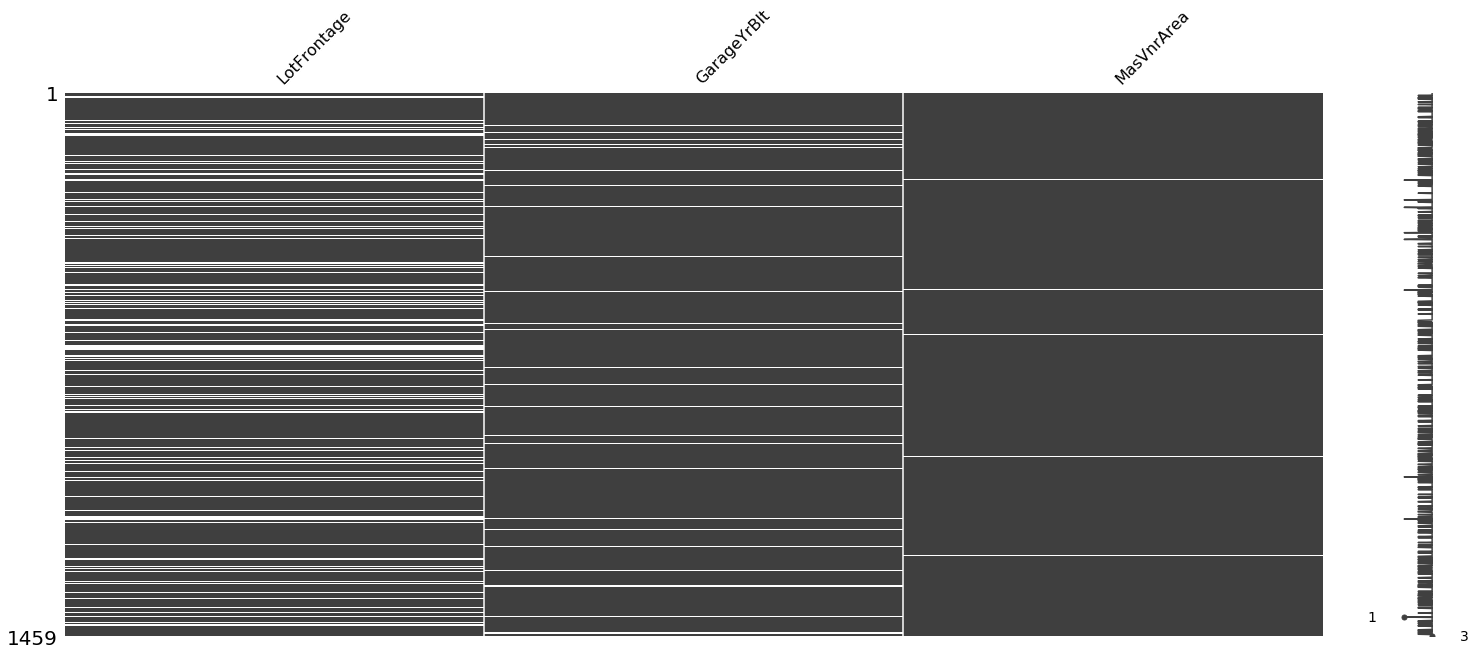

In [179]:
mn.matrix(train[numNull_col])

In [180]:
#Next steps:
#Impute numerical, then categorical nulls
#Determine ordinal vs pure categorical
#Impute ordinal values with 0
#Find correlations between features and log of sale price
#Remove unnecessary columns
#Regression analysis

In [181]:
np.mean(train[numNull_col])

#Lot frontage impute mean
#Garage Year Built, impute house year built
#Masonry impute mean

LotFrontage      70.047500
GarageYrBlt    1978.485486
MasVnrArea      103.756720
dtype: float64

In [182]:
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())

In [183]:
print(train['LotFrontage'].isnull().sum())
print(np.mean(train['LotFrontage']))

0
70.0475000000001


In [184]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['YearBuilt'])

In [185]:
print(train['GarageYrBlt'].isnull().sum())

0


In [186]:
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())

In [187]:
print(train['MasVnrArea'].isnull().sum())
print(np.mean(train['MasVnrArea']))

0
103.75671950379045


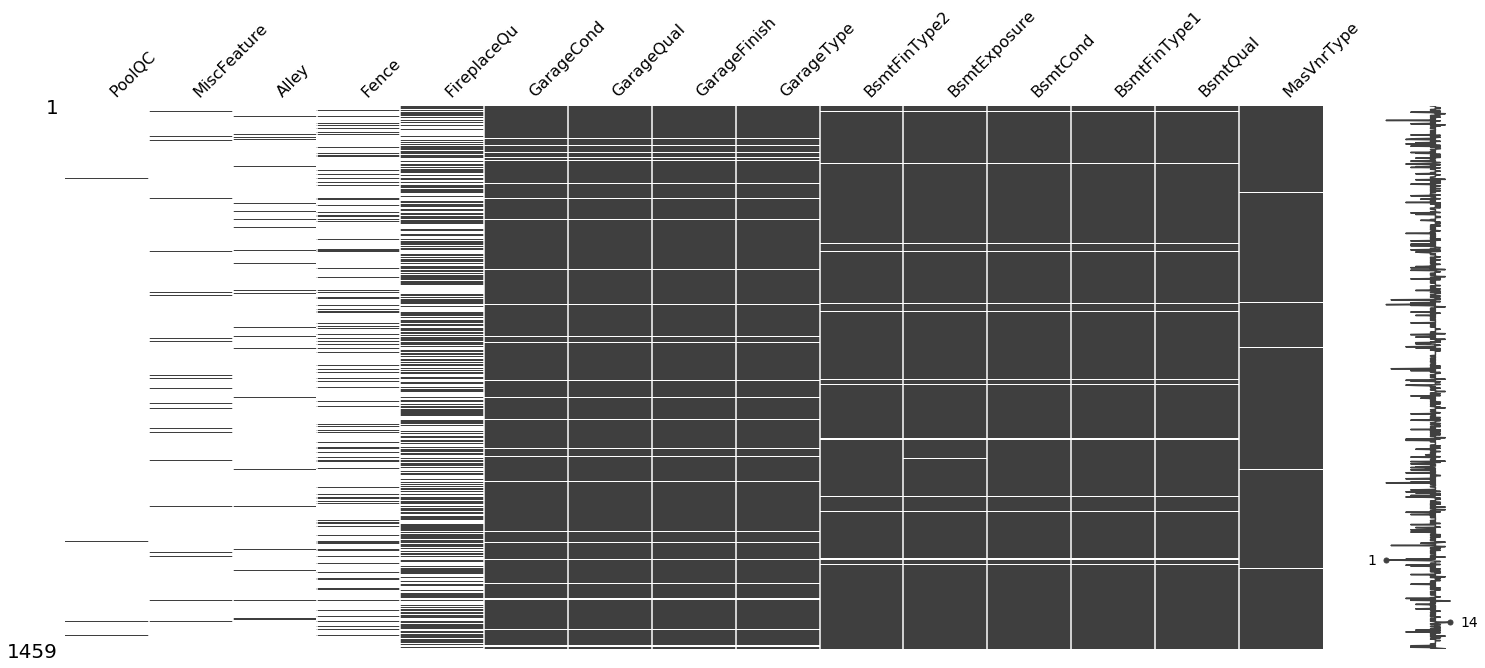

In [188]:
mn.matrix(train[catNull_col])

In [218]:
uniquecats = [train[i].unique() for i in catNull_col]
#uniquecats = [train[i].nunique() for i in catNull_col]
print(uniquecats)
print(catNull_col)

#Function: pull index from item and count times it occurs in dataframe...write to dictionary
#Heatmap to find highest linearly correlated variable...run KNN against that

[array([nan, 'Ex', 'Fa', 'Gd'], dtype=object), array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object), array([nan, 'Grvl', 'Pave'], dtype=object), array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object), array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object), array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object), array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object), array(['RFn', 'Unf', 'Fin', nan], dtype=object), array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'], dtype=object), array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object), array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object), array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object), array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object), array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object), array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)]
Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond',
       'GarageQual', 'GarageFini

In [227]:
print(catNull_col)

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond',
       'GarageQual', 'GarageFinish', 'GarageType', 'BsmtFinType2',
       'BsmtExposure', 'BsmtCond', 'BsmtFinType1', 'BsmtQual', 'MasVnrType'],
      dtype='object')


In [283]:
for i in catNull_col:
    catNull_dict[i] = train[i].value_counts(dropna = False)

In [306]:
from math import isnan

catNull_frame = pd.DataFrame()
catNull_frame = catNull_frame.from_dict(catNull_dict)
catNull_dict2 = catNull_frame.to_dict()
# for sub in catNull_dict2:
#     for key in sub:
#         sub[key] = int(sub[key])
catNull_dict2 = {k: catNull_dict2[k] for k in catNull_col if not isnan(k)}

#type(catNull_dict2['Alley']['ALQ']) <-- nan was np.float64


#Alley: new variable called "None" on all NaN


TypeError: must be real number, not str

In [261]:
value_to_remove = ['Name: PoolQC',  'Name: MiscFeature', 'Name: MasVnrType', 'Name: GarageType', 'Name: GarageQual', \
                    'Name: GarageFinish', 'Name: GarageCond', 'Name: FireplaceQu', 'Name: Fence', 'Name: BsmtQual', \
                    'Name: BsmtFinType2', 'Name: BsmtFinType1', 'Name: BsmtExposure', 'Name: BsmtCond', 'Name: Alley', \
                    'dtype: int64']
some_dict = {key: value for key, value in catNull_dict.items() if value not in value_to_remove}

C:\Users\kweku\Anaconda3\lib\site-packages\pandas\core\ops.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

In [263]:
some_dict = {key: value for key, value in catNull_dict.items()}

In [264]:
some_dict

{'Alley': Grvl    50
 Pave    41
 Name: Alley, dtype: int64, 'BsmtCond': TA    1310
 Gd      65
 Fa      45
 Po       2
 Name: BsmtCond, dtype: int64, 'BsmtExposure': No    952
 Av    221
 Gd    134
 Mn    114
 Name: BsmtExposure, dtype: int64, 'BsmtFinType1': Unf    429
 GLQ    418
 ALQ    220
 BLQ    148
 Rec    133
 LwQ     74
 Name: BsmtFinType1, dtype: int64, 'BsmtFinType2': Unf    1255
 Rec      54
 LwQ      46
 BLQ      33
 ALQ      19
 GLQ      14
 Name: BsmtFinType2, dtype: int64, 'BsmtQual': TA    649
 Gd    617
 Ex    121
 Fa     35
 Name: BsmtQual, dtype: int64, 'Fence': MnPrv    157
 GdPrv     59
 GdWo      54
 MnWw      11
 Name: Fence, dtype: int64, 'FireplaceQu': Gd    380
 TA    313
 Fa     33
 Ex     24
 Po     20
 Name: FireplaceQu, dtype: int64, 'GarageCond': TA    1325
 Fa      35
 Gd       9
 Po       7
 Ex       2
 Name: GarageCond, dtype: int64, 'GarageFinish': Unf    605
 RFn    422
 Fin    351
 Name: GarageFinish, dtype: int64, 'GarageQual': TA    1310
 Fa    